In [6]:
import warnings
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from IPython.display import clear_output
warnings.filterwarnings('ignore')  
plt.rcParams['text.usetex'] = True

# Diffusion

$\textit{Diffusion Equation} : \partial_t \hat{\phi}_k = -\kappa k^2\hat{\phi}_k$                                                                                    


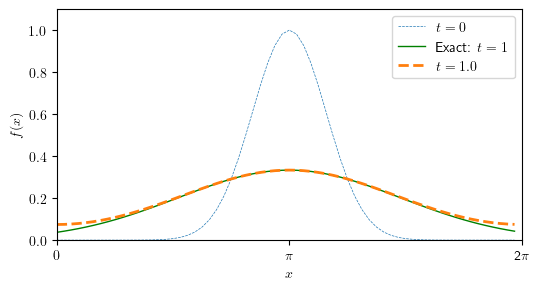

In [7]:
k = 1
L = 2*np.pi
N = 64
h = L/N
j = np.arange(0,N)
x = j*h
tf = 1
dt = 0.001
nsteps = int(tf/dt)
prefactor = k*dt/h**2

a = 1/2
a_p = np.sqrt(a**2+2*k*tf)
f_exact = (a/a_p)*np.exp(-(x-np.pi)**2/(2*a_p**2))

init_temp = np.exp(-2*(x-np.pi)**2)
f        = np.zeros(N+2)
f_mid    = np.zeros(N+2)
f[1:N+1] = init_temp
f[0]     = init_temp[-1]
f[N+1]   = init_temp[0]

for i in range(nsteps+2):
    f_mid[1:N+1] = f[1:N+1] +(prefactor/2)*(f[0:N]-2*f[1:N+1]+f[2:N+2])
    f_mid[0] = f_mid[N]
    f_mid[-1] = f_mid[1]

    f[1:N+1] = f[1:N+1] + prefactor*(f_mid[0:N]-2*f_mid[1:N+1]+f_mid[2:N+2])
    f[0] = f[N]
    f[-1] = f[1]
    
    t= i*dt
    if (i%200 == 0):
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(6,3))
        ax.plot(x, init_temp, '--', label = '$t=0$', lw = 0.5)
        ax.plot(x, f_exact, 'g-', label = 'Exact: $t=1$', lw = 1)
        ax.plot(x, f[1:N+1],'--', label = f'$t={t}$', lw = 2)
        ax.set_xlim(0,2*np.pi)
        ax.set_ylim(0,1.1)
        ax.set_xlabel('$x$',fontsize=10)
        ax.set_ylabel('$f(x)$',fontsize=10)
        ax.set_xticks([0, np.pi, 2*np.pi],['$0$', '$\pi$', '2$\pi$'])
        ax.legend()
        plt.show()

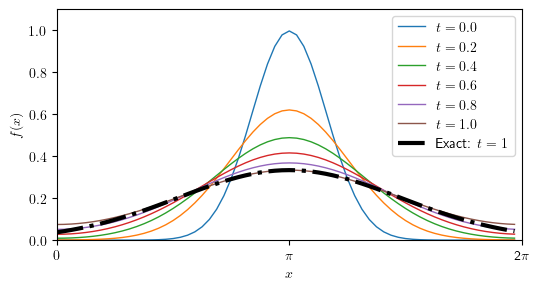

In [8]:
k = 1
L = 2*np.pi
N = 64
h = L/N
j = np.arange(0,N)
x = j*h
tf = 1
dt = 0.001
nsteps = int(tf/dt)
prefactor = k*dt/h**2

a = 1/2
a_p = np.sqrt(a**2+2*k*tf)
f_exact = (a/a_p)*np.exp(-(x-np.pi)**2/(2*a_p**2))

init_temp = np.exp(-2*(x-np.pi)**2)
f        = np.zeros(N+2)
f_mid    = np.zeros(N+2)
f[1:N+1] = init_temp
f[0]     = init_temp[-1]
f[N+1]   = init_temp[0]
fig, ax = plt.subplots(figsize=(6,3))
        
for i in range(nsteps+2):
    f_mid[1:N+1] = f[1:N+1] +(prefactor/2)*(f[0:N]-2*f[1:N+1]+f[2:N+2])
    f_mid[0] = f_mid[N]
    f_mid[-1] = f_mid[1]

    f[1:N+1] = f[1:N+1] + prefactor*(f_mid[0:N]-2*f_mid[1:N+1]+f_mid[2:N+2])
    f[0] = f[N]
    f[-1] = f[1]
    
    t= i*dt
    if (i%200 == 0):
        ax.plot(x, f[1:N+1],'-', label = f'$t={t}$', lw = 1)
ax.plot(x, f_exact, 'k-.', label = 'Exact: $t=1$', lw = 3)

ax.set_xlim(0,2*np.pi)
ax.set_ylim(0,1.1)
ax.set_xlabel('$x$',fontsize=10)
ax.set_ylabel('$f(x)$',fontsize=10)
ax.set_xticks([0, np.pi, 2*np.pi],['$0$', '$\pi$', '2$\pi$'])
ax.legend()
plt.show()

# Wave                                                                                                                               


### 1. **Upwind Difference Scheme**
The **upwind scheme** is particularly useful for solving hyperbolic partial differential equations, where the direction of wave propagation (or flow of information) is important.

#### **First-Order Upwind Difference (for Spatial Derivatives)**

For a first-order spatial derivative $ \frac{\partial u}{\partial x} $, the upwind difference can be written as:

- **For positive velocity (rightward propagation)**:
  
  $\frac{\partial u}{\partial x} \approx \frac{u_i - u_{i-1}}{\Delta x} \quad \text{(backward difference)}$

- **For negative velocity (leftward propagation)**:
  
  $\frac{\partial u}{\partial x} \approx \frac{u_{i+1} - u_i}{\Delta x} \quad \text{(forward difference)}$ 

The choice of using a forward or backward difference depends on the direction of wave propagation.                             
For example, if the wave propagates to the right, you would use the backward difference.                                     
If it propagates to the left, you would use the forward difference.

#### **Application to the Advection Equation**
The advection equation is a typical case where upwind schemes are used:

$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$

Using the upwind method for the spatial derivative:

- If \( c > 0 \) (rightward propagation):
  
  $\frac{u_i^{n+1} - u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0$                                      
  
  $u_i^{n+1} = u_i^n - \frac{c \Delta t}{\Delta x}  \bigg( u_{i}^n - u_{i-1}^n \bigg)$  


- If \( c < 0 \) (leftward propagation):
  
  $\frac{u_i^{n+1} - u_i^n}{\Delta t} + c \frac{u_{i+1}^n - u_i^n}{\Delta x} = 0$
  
  $u_i^{n+1} = u_i^n - \frac{c \Delta t}{\Delta x}  \bigg( u_{i+1}^n - u_{i}^n \bigg)$  


#### **Advantages of the Upwind Method**:
- It respects the direction of wave propagation.
- It tends to be more stable for hyperbolic problems where the solution has sharp fronts or discontinuities.

#### **Disadvantages**:
- The first-order upwind method introduces numerical diffusion, leading to the smearing of sharp fronts over time.


### 2. **Central Difference Scheme**
The **central difference scheme** is another popular method for approximating derivatives.                                      
It uses a point at the center between two neighboring points and provides higher accuracy (second-order) compared to upwind schemes.

#### **First-Order Central Difference (for Spatial Derivatives)**

For the first-order spatial derivative $ \frac{\partial u}{\partial x} $, the central difference approximation is:

$\frac{\partial u}{\partial x} \approx \frac{u_{i+1} - u_{i-1}}{2 \Delta x}$                                                     
$\frac{u_i^{n+1} - u_i^n}{\Delta t} + c \frac{u_{i+1}^n - u_{i-1}^n}{2\Delta x} = 0$                                            
$u_i^{n+1} = u_i^n - \frac{c \Delta t}{2\Delta x}  \bigg( u_{i+1}^n - u_{i-1}^n \bigg)$  

#### **Second-Order Spatial Derivative (for Wave Equation)**

For the second-order spatial derivative \( \frac{\partial^2 u}{\partial x^2} \), the central difference is:

$\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2}$

#### **Advantages of the Central Difference Scheme:**
- Second-order accuracy, which provides higher precision compared to first-order methods.
- Symmetry between forward and backward directions, making it well-suited for problems where no preferred direction of propagation exists.
#### **Disadvantages:**
- Can be less stable compared to upwind methods in some hyperbolic problems, especially in the presence of shocks or discontinuities.
- Requires careful handling of boundary conditions.

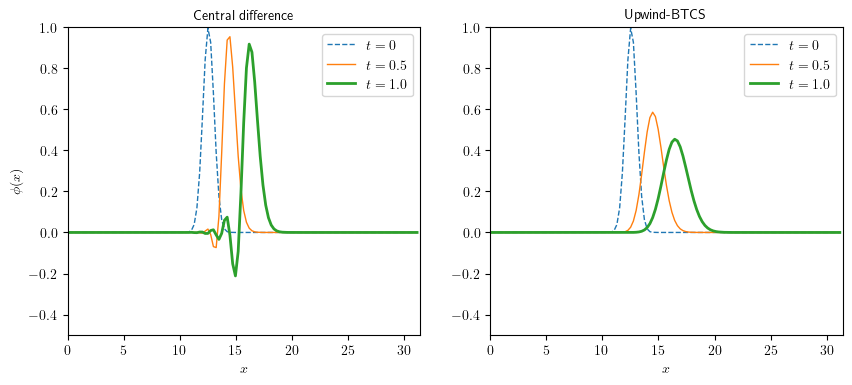

In [9]:
c = 4
tf = 1
dt = 0.001
nsteps = int(tf/dt)
L = 10*np.pi
N = 128
h = L/N
j = np.arange(0,N)
x = j*h
init_f = np.exp(-2*(x-4*np.pi)**2)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))
# Evolution wirh central difference method.
prefactor = -c*dt/(2*h)
f = np.zeros(N+2)
f[1:N+1] = init_f
f[0] = init_f[-1]
f[N+1] = init_f[0]
ax1.plot(x, f[1:N+1], '--', lw = 1, label='$t=0$')
for i in range(nsteps+2):
    f[1:N+1] = f[1:N+1] + prefactor*(f[2:N+2]-f[0:N])
    f[0] = f[N]
    f[-1] = f[1]
    if (i%500 == 0) & (i!=0) :
        ax1.plot(x, f[1:N+1], lw = i/500*1,label = f'$t={i*dt}$')
ax1.legend()
ax1.set_xlim(0,L)
ax1.set_ylim(-0.5,1)
ax1.set_xlabel('$x$',fontsize=10)
ax1.set_ylabel('$\phi(x)$',fontsize=10)
ax1.set_title('Central difference',fontsize=10)

# Evolution wirh upwind method. FTBS
prefactor = -c*dt/(h)
f = np.zeros(N+2);
f[1:N+1] = init_f
f[0] = init_f[-1]
f[N+1] = init_f[0]
ax2.plot(x, f[1:N+1], '--', lw = 1, label='$t=0$')
for i in range(nsteps+2):
    f[1:N+1] = f[1:N+1] + prefactor*(f[1:N+1]-f[0:N])
    f[0] = f[N]
    f[-1] = f[1]
    if (i%500 == 0) & (i!=0) :
        ax2.plot(x, f[1:N+1], lw = i/500*1,label = f'$t={i*dt}$')
ax2.legend()
ax2.set_xlim(0,L)
ax2.set_ylim(-0.5,1)
ax2.set_xlabel('$x$',fontsize=10)
ax2.set_title('Upwind-BTCS',fontsize=10)
plt.show()

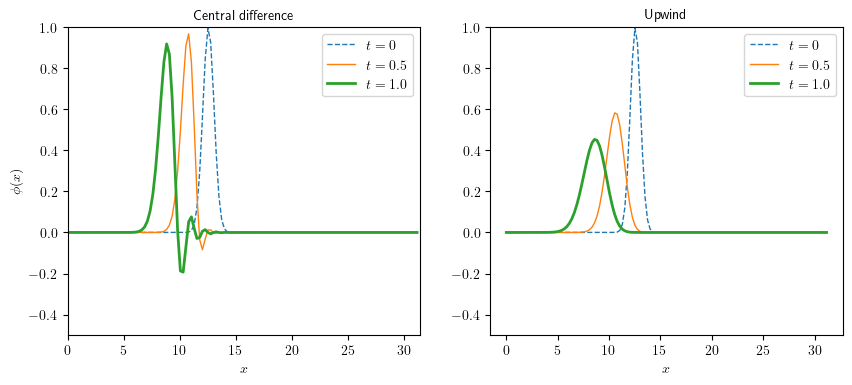

In [10]:
c = -4
tf = 1
dt = 0.001
nsteps = int(tf/dt)
L = 10*np.pi
N = 128
h = L/N
j = np.arange(0,N)
x = j*h
init_f = np.exp(-2*(x-4*np.pi)**2)

fig, (ax1, ax3) = plt.subplots(1,2,figsize=(10, 4))
# Evolution wirh central difference method.
prefactor = -c*dt/(2*h)
f = np.zeros(N+2)
f[1:N+1] = init_f
f[0] = init_f[-1]
f[N+1] = init_f[0]
ax1.plot(x, f[1:N+1], '--', lw = 1, label='$t=0$')
for i in range(nsteps+2):
    f[1:N+1] = f[1:N+1] + prefactor*(f[2:N+2]-f[0:N])
    f[0] = f[N]
    f[-1] = f[1]
    if (i%500 == 0) & (i!=0) :
        ax1.plot(x, f[1:N+1], lw = i/500*1,label = f'$t={i*dt}$')
ax1.legend()
ax1.set_xlim(0,L)
ax1.set_ylim(-0.5,1)
ax1.set_xlabel('$x$',fontsize=10)
ax1.set_ylabel('$\phi(x)$',fontsize=10)
ax1.set_title('Central difference',fontsize=10)

# Evolution wirh upwind method. FTFS
prefactor = -c*dt/(h)
f = np.zeros(N+2);
f[1:N+1] = init_f
f[0] = init_f[-1]
f[N+1] = init_f[0]
ax3.plot(x, f[1:N+1], '--', lw = 1, label='$t=0$')
for i in range(nsteps+2):
    f[1:N+1] = f[1:N+1] + prefactor*(f[2:N+2]-f[1:N+1])
    f[0] = f[N]
    f[-1] = f[1]
    if (i%500 == 0) & (i!=0) :
        ax3.plot(x, f[1:N+1], lw = i/500*1,label = f'$t={i*dt}$')
ax3.legend()
#ax3.set_xlim(-L,0)
ax3.set_ylim(-0.5,1)
ax3.set_xlabel('$x$',fontsize=10)
ax3.set_title('Upwind',fontsize=10)
plt.show()

forward

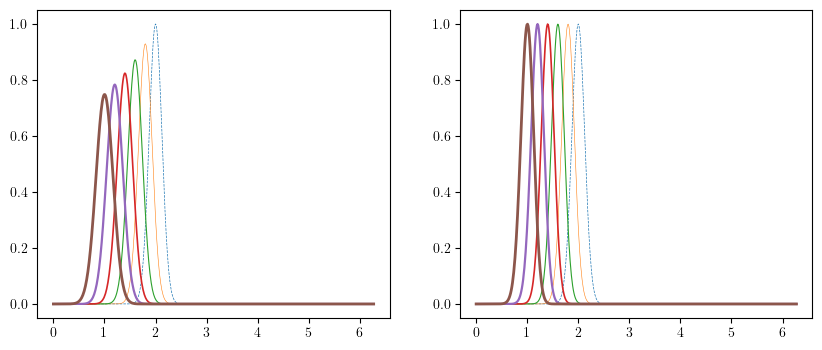

In [11]:
c  = -1
L = 2*np.pi
N = 512
h = L/N
j = np.arange(0,N)
x = j*h
tf = 1
dt = 0.001
nsteps    = int(tf/dt)
init      = np.exp(-32*(x-2)**2)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))

prefactor = -c*dt/h
f         = np.zeros(N+2)
f_mid     = np.zeros(N+2)
f[1:N+1]  = init
f[0]      = init[-1]
f[N+1]    = init[0]
ax1.plot(x, f[1:N+1], '--', lw = 0.5)

for i in range(nsteps+2):
    f_mid[1:N+1] = f[1:N+1] + (prefactor/2)*(f[2:N+2]-f[1:N+1])
    f_mid[0]     = f_mid[N]
    f_mid[-1]    = f_mid[1]

    f[1:N+1] = f[1:N+1] + prefactor*(f_mid[2:N+2]-f_mid[1:N+1])
    f[0]     = f[N]
    f[-1]    = f[1]
    
    if (i%200 == 0) & (i!=0)  :
        ax1.plot(x, f[1:N+1], lw = i/500*1,label = f'$t={i*dt}$')
        

prefactor = -c*dt/(2*h)
f = np.zeros(N+2)
f_mid = np.zeros(N+2)
f[1:N+1] = init
f[0] = init_temp[-1]
f[N+1] = init_temp[0]
ax2.plot(x, f[1:N+1], '--', lw = 0.5)

# Evolution wirh RK2 method.
for i in range(nsteps+1):
    f_mid[1:N+1] = f[1:N+1] + (prefactor/2)*(f[2:N+2]-f[0:N])
    f_mid[0]     = f_mid[N]
    f_mid[-1]    = f_mid[1]

    f[1:N+1] = f[1:N+1] + prefactor*(f_mid[2:N+2]-f_mid[0:N])
    f[0]     = f[N]
    f[-1]    = f[1]
    
    if (i%200 == 0) & (i!=0) :
        ax2.plot(x, f[1:N+1], lw = i/500*1,label = f'$t={i*dt}$')

backward

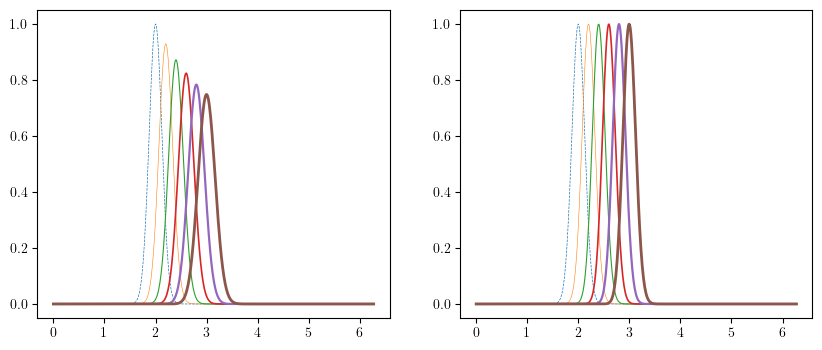

In [12]:
c  = 1
L = 2*np.pi
N = 512
h = L/N
j = np.arange(0,N)
x = j*h
tf = 1
dt = 0.001
nsteps    = int(tf/dt)
init      = np.exp(-32*(x-2)**2)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))

prefactor = -c*dt/h
f         = np.zeros(N+2)
f_mid     = np.zeros(N+2)
f[1:N+1]  = init
f[0]      = init[-1]
f[N+1]    = init[0]
ax1.plot(x, f[1:N+1], '--', lw = 0.5)
for i in range(nsteps+2):
    f_mid[1:N+1] = f[1:N+1] +(prefactor/2)*(f[1:N+1]-f[0:N])
    f_mid[0]     = f_mid[N]
    f_mid[-1]    = f_mid[1]

    f[1:N+1] = f[1:N+1] + prefactor*(f_mid[1:N+1]-f_mid[0:N])
    f[0]     = f[N]
    f[-1]    = f[1]
        
    if (i%200 == 0) & (i!=0)  :
        ax1.plot(x, f[1:N+1], lw = i/500*1,label = f'$t={i*dt}$')
        
prefactor = -c*dt/(2*h)
f = np.zeros(N+2)
f_mid = np.zeros(N+2)
f[1:N+1] = init
f[0] = init_temp[-1]
f[N+1] = init_temp[0]
ax2.plot(x, f[1:N+1], '--', lw = 0.5)

# Evolution wirh RK2 method.
for i in range(nsteps+1):
    f_mid[1:N+1] = f[1:N+1] + (prefactor/2)*(f[2:N+2]-f[0:N])
    f_mid[0]     = f_mid[N]
    f_mid[-1]    = f_mid[1]

    f[1:N+1] = f[1:N+1] + prefactor*(f_mid[2:N+2]-f_mid[0:N])
    f[0]     = f[N]
    f[-1]    = f[1]
    
    if (i%200 == 0) & (i!=0) :
        ax2.plot(x, f[1:N+1], lw = i/500*1,label = f'$t={i*dt}$')

## Burgers Equation

$\textit{Burgers Equation} : \partial_t u + u\partial_x u = \nu\partial_{x}^2u$                                                  

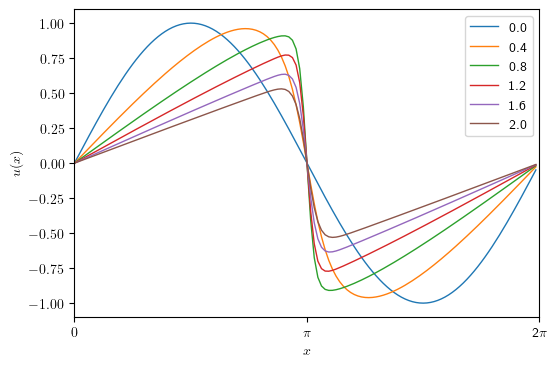

In [13]:
nu = 0.1
tf = 2
dt = 0.001
nsteps = int(tf/dt)

L = 2*np.pi
N = 128
h = L / N
j = np.arange(0,N)
x = j*h

init_f   = np.sin(x)

f        = np.zeros(N+2)
fmid     = np.zeros(N+2)
f[1:N+1] = init_f
f[0]     = init_f[-1]
f[N+1]   = init_f[0]

fig, ax1 = plt.subplots(figsize=(6, 4))

for time_ind in range(nsteps+2):
    fmid[1:N+1] = f[1:N+1] - (dt/(2*h))*f[1:N+1]*(f[2:N+2]-f[0:N]) + (nu*dt/(2*h**2))*(f[2:N+2]-2*f[1:N+1]+f[0:N])
    fmid[ 0] = fmid[N]
    fmid[-1] = fmid[1]
    f[1:N+1] = f[1:N+1] - (dt/h)*fmid[1:N+1]*(fmid[2:N+2]-fmid[0:N]) + (nu*dt/h**2)*(fmid[2:N+2]-2*fmid[1:N+1]+fmid[0:N])
    f[ 0] = f[N]
    f[-1] = f[1]
    t= time_ind*dt
    if (time_ind%400 == 0):
        ax1.plot(x, f[1:N+1], lw = 1, label = t)
ax1.set_xlim(0,2*np.pi)
ax1.set_xlabel('$x$',fontsize=10)
ax1.set_ylabel('$u(x)$',fontsize=10)
ax1.set_xticks([0, np.pi, 2*np.pi])
ax1.set_xticklabels(['$0$', '$\pi$', '2$\pi$'])
plt.legend()
plt.show()

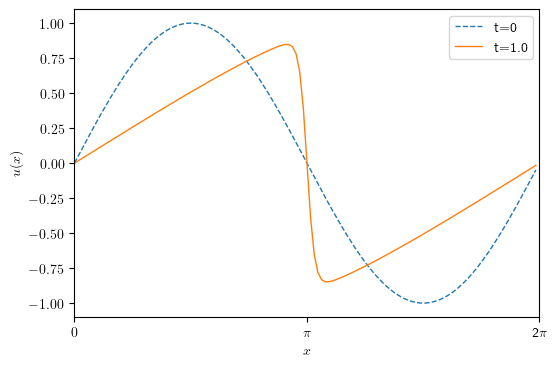

In [14]:
nu = 0.1
tf = 1
dt = 0.001
nsteps = int(tf/dt)

L = 2*np.pi
N = 128
h = L / N
j = np.arange(0,N)
x = j*h

init_f   = np.sin(x)

f        = np.zeros(N+2)
fmid     = np.zeros(N+2)
f[1:N+1] = init_f
f[0]     = init_f[-1]
f[N+1]   = init_f[0]
fx       = f.copy()
for time_ind in range(nsteps+2):
    fmid[1:N+1] = f[1:N+1] - (dt/(2*h))*f[1:N+1]*(f[2:N+2]-f[0:N]) + (nu*dt/(2*h**2))*(f[2:N+2]-2*f[1:N+1]+f[0:N])
    fmid[ 0] = fmid[N]
    fmid[-1] = fmid[1]
    f[1:N+1] = f[1:N+1] - (dt/h)*fmid[1:N+1]*(fmid[2:N+2]-fmid[0:N]) + (nu*dt/h**2)*(fmid[2:N+2]-2*fmid[1:N+1]+fmid[0:N])
    f[ 0] = f[N]
    f[-1] = f[1]
    t= time_ind*dt
    if (time_ind%200 == 0):
        clear_output(wait=True)
        fig, ax1 = plt.subplots(figsize=(6, 4))
        ax1.plot(x, fx[1:N+1],'--', lw = 1, label = 't=0')
        ax1.plot(x, f[1:N+1], lw = 1, label = f't={t}')
        ax1.set_xlim(0,2*np.pi)
        ax1.set_xlabel('$x$',fontsize=10)
        ax1.set_ylabel('$u(x)$',fontsize=10)
        ax1.set_xticks([0, np.pi, 2*np.pi])
        ax1.set_xticklabels(['$0$', '$\pi$', '2$\pi$'])
        ax1.legend()
        plt.show()

## KdV Equation

$\textit{KdV Equation} : \partial_t u + u\partial_x u = \kappa\partial_{x}^3u$



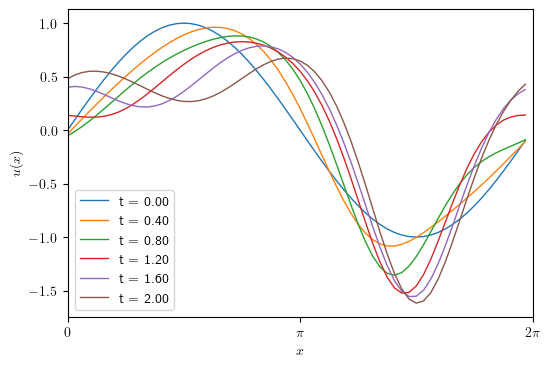

In [15]:
kappa = 0.1
tf = 2      
dt = 0.001 
nsteps = int(tf / dt)

L = 2 * np.pi  
N = 64
h = L / N     
#j = np.arange(0, N)  
#x = j * h 
x = np.linspace(0, L, N, endpoint=False)
init_f = np.sin(x)

f          = np.zeros(N+4)    
fmid       = np.zeros(N+4)
f[2:N+2]   = init_f
f[0:2]     = init_f[-2:]  
f[N+2:N+4] = init_f[0:2]  

fig, ax1 = plt.subplots(figsize=(6, 4))

for time_ind in range(nsteps + 3):
    fmid[2:N+2]   = (f[2:N+2] - (dt / (2*h)) * f[2:N+2] * (f[3:N+3] - f[1:N+1]) 
                    - (kappa * dt / (2*h**3)) * (-f[4:N+4] + 2*f[3:N+3] - 2*f[1:N+1] + f[0:N]))
    fmid[0:2]     = fmid[N:N+2]  
    fmid[N+2:N+4] = fmid[2:4]  
    
    f[2:N+2]      = (f[2:N+2] - (dt / (2*h)) * fmid[2:N+2] * (fmid[3:N+3] - fmid[1:N+1])
                    - (kappa * dt /(h**3)) * (-fmid[4:N+4] + 2*fmid[3:N+3] - 2*fmid[1:N+1] + fmid[0:N]))
    f[0:2]        = f[N:N+2]  
    f[N+2:N+4]    = f[2:4]  
    
    t = time_ind * dt
    if time_ind % 400 == 0:
        ax1.plot(x, f[2:N+2], lw=1, label=f't = {t:.2f}')

ax1.set_xlim(0, 2 * np.pi)
ax1.set_xlabel('$x$', fontsize=10)
ax1.set_ylabel('$u(x)$', fontsize=10)
ax1.set_xticks([0, np.pi, 2*np.pi])
ax1.set_xticklabels(['$0$', '$\pi$', '$2\pi$'])
plt.legend()
plt.show()

# Navier-Strokes Eqn.

$ \qquad \partial_tu + u\cdot\nabla u = -\frac{1}{\rho}{\nabla p} + \nu\nabla^2 u$                                                                          
$ \qquad \nabla\cdot u=0$                                                                                                                                 
$ \qquad \nabla^2 p=-\rho\nabla\cdot\left[u\cdot\nabla u \right]$                                                                                              
$ \qquad \frac{u^{*}-u_n}{\Delta t}=-u_n\cdot\nabla u_n + \nu\nabla^2u_n $                                                                                      
$ \qquad \nabla^2 p_{n+1} = \frac{\rho}{\Delta t} \nabla\cdot u^*$                                                                                             
$ \qquad u_{n+1}-u^*=-\frac{\Delta t}{\rho} \nabla p_{n+1}$

This is the **incompressible Navier–Stokes equations** in a ND periodic domain size using Chorin-style projection method:


In [16]:
def partial_derivative_x(field):
    diff = np.zeros_like(field)
    diff[1:-1, 1:-1] = (field[2:, 1:-1] - field[0:-2, 1:-1]) / (2 * element_length)
    return diff

def partial_derivative_y(field):
    diff = np.zeros_like(field)
    diff[1:-1, 1:-1] = (field[1:-1, 2:] - field[1:-1, 0:-2]) / (2 * element_length)
    return diff

def laplace(field):
    diff = np.zeros_like(field)
    diff[1:-1, 1:-1] = (field[0:-2, 1:-1] + field[1:-1, 0:-2] - 4 * field[1:-1, 1:-1] +
                        field[2:, 1:-1] + field[1:-1, 2:]) / (element_length ** 2)
    return diff

def divergence(vector_field):
    return partial_derivative_x(vector_field[..., 0]) + partial_derivative_y(vector_field[..., 1])

def gradient(field):
    return np.concatenate(
            (partial_derivative_x(field)[..., np.newaxis], partial_derivative_y(field)[..., np.newaxis]),axis=-1)

def curl_2d(vector_field):
    return partial_derivative_x(vector_field[..., 1]) - partial_derivative_y(vector_field[..., 0])

def advect(field, vector_field):
    backtraced_positions = np.clip(coordinates - TIME_STEP_LENGTH * vector_field, 0.0, DOMAIN_SIZE)
    advected_field = sc.interpolate.interpn(points=(x, y),values=field,xi=backtraced_positions,)
    return advected_field

def diffusion_operator(vector_field_flattened):
    vector_field = vector_field_flattened.reshape(vector_shape)
    diffusion_applied = vector_field - KINEMATIC_VISCOSITY * TIME_STEP_LENGTH * laplace(vector_field)
    return diffusion_applied.flatten()

def poisson_operator(field_flattened):
    field = field_flattened.reshape(scalar_shape)
    poisson_applied = laplace(field)
    return poisson_applied.flatten()


Let the initial velocity field be given by the **Taylor–Green vortex**:

$\qquad\qquad\displaystyle \left\{\begin{array}{rl} u_x(x, y) &= \quad \sin(x) \cos(y), \\ u_y(x, y) &= -\cos(x) \sin(y). \end{array} \right. $                                                                  

* Viscosity: $\nu = 0.1$
* Grid: $32 \times 32$
* Domain: $x, y \in [0, 2\pi)$
* Final time: $T = 1.0$

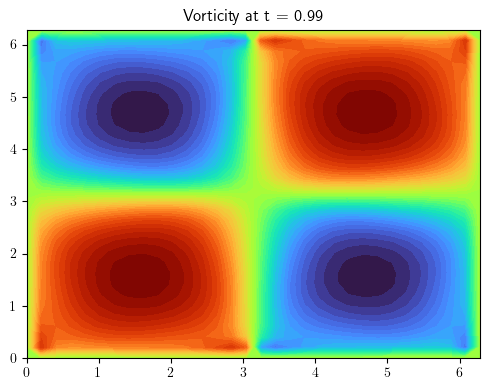

In [17]:
DOMAIN_SIZE         = 2.0 * np.pi
N_POINTS            = 32
TIME_STEP_LENGTH    = 0.001
N_TIME_STEPS        = int(1.0 / TIME_STEP_LENGTH)
KINEMATIC_VISCOSITY = 0.1
MAX_ITER_CG         = None

element_length = DOMAIN_SIZE / (N_POINTS - 1)
scalar_shape   = (N_POINTS, N_POINTS)
scalar_dof     = N_POINTS ** 2
vector_shape   = (N_POINTS, N_POINTS, 2)
vector_dof     = N_POINTS ** 2 * 2

x = np.linspace(0.0, DOMAIN_SIZE, N_POINTS)
y = x.copy()
X, Y = np.meshgrid(x, y, indexing="ij")
coordinates = np.stack((X, Y), axis=-1)

# --- Initial Condition: Taylor–Green Vortex ---
velocities_prev = np.zeros(vector_shape)
velocities_prev[..., 0] =  np.sin(X) * np.cos(Y)  # u_x
velocities_prev[..., 1] = -np.cos(X) * np.sin(Y)  # u_y

# --- Main Time Loop ---
time_current = 0.0
for step in range(N_TIME_STEPS):
    time_current += TIME_STEP_LENGTH

    # (1) Semi-Lagrangian advection
    velocities_advected = np.zeros_like(velocities_prev)
    for d in range(2):
        velocities_advected[..., d] = advect(velocities_prev[..., d], velocities_prev)

    # (2) Diffusion step (CG solve)
    v_adv_flat = velocities_advected.flatten()
    v_diff_flat, _ = sc.sparse.linalg.cg(
        A=sc.sparse.linalg.LinearOperator((vector_dof, vector_dof), matvec=diffusion_operator),
        b=v_adv_flat, maxiter=MAX_ITER_CG )
    velocities_diffused = v_diff_flat.reshape(vector_shape)

    # (3) Pressure projection step
    div_field = divergence(velocities_diffused).flatten()
    pressure_flat, _ = sc.sparse.linalg.cg(
        A=sc.sparse.linalg.LinearOperator((scalar_dof, scalar_dof), matvec=poisson_operator),
        b=div_field, maxiter=MAX_ITER_CG )
    pressure = pressure_flat.reshape(scalar_shape)
    grad_p = gradient(pressure)
    velocities_projected = velocities_diffused - grad_p * TIME_STEP_LENGTH

    # Update velocity field
    velocities_prev = velocities_projected

    # Plotting
    if step % 10 == 0:
        curl = curl_2d(velocities_projected)
        plt.figure(figsize=(5, 4))
        plt.contourf(X, Y, curl, cmap='turbo', levels=50)
        #plt.quiver(X, Y, velocities_projected[..., 0], velocities_projected[..., 1], color='k', alpha=0.5, scale=50)
        plt.title(f'Vorticity at t = {time_current:.2f}')
        #plt.axis("off")
        plt.tight_layout()
        clear_output(wait=True)
        plt.show()

A **2D incompressible viscous fluid** in a square box of size $1 \times 1$, with periodic or no-flow boundary handling implied by the grid setup.         
The **velocity field** is evolved over time using:

$\qquad\displaystyle\frac{\partial \vec{u}}{\partial t} + (\vec{u} \cdot \nabla)\vec{u} = -\nabla p + \nu \nabla^2 \vec{u} + \vec{f}(x, y, t)$

$\qquad\displaystyle\nabla \cdot \vec{u} = 0$

A vertical jet force where:

* $\vec{u} = (u_x, u_y)$: velocity field
* $p$: pressure field
* $\nu = 10^{-4}$: kinematic viscosity
* $\vec{f}(x, y, t)$: **external time-dependent forcing** applied locally
* **vorticity**: $\displaystyle\omega = \frac{\partial u_y}{\partial x} - \frac{\partial u_x}{\partial y}$ which tells you how much and where the fluid is rotating.

The output system represents the vorticity field of a 2D incompressible viscous fluid, initially at rest,                                               
responding to a short-lived localized vertical force, forming vortices that evolve and decay due to viscosity.

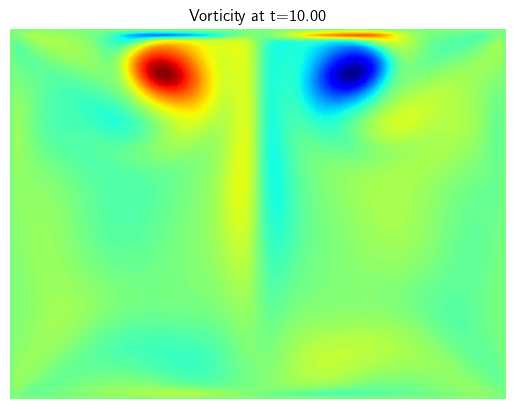

In [18]:
def forcing_function(time, point):
    time_decay = np.maximum(2.0 - 0.5 * time, 0.0)
    forced_value = (time_decay * np.where((point[0] > 0.4) & (point[0] < 0.6) & (point[1] > 0.1) & (point[1] < 0.3),
                     np.array([0.0, 1.0]),np.array([0.0, 0.0]) ) )
    return forced_value
    
DOMAIN_SIZE         = 1.0
N_POINTS            = 64
N_TIME_STEPS        = 100
TIME_STEP_LENGTH    = 0.1
KINEMATIC_VISCOSITY = 0.0001
MAX_ITER_CG         = None
element_length = DOMAIN_SIZE / (N_POINTS - 1)
scalar_shape   = (N_POINTS, N_POINTS)
scalar_dof     = N_POINTS ** 2
vector_shape   = (N_POINTS, N_POINTS, 2)
vector_dof     = N_POINTS ** 2 * 2

x    = np.linspace(0.0, DOMAIN_SIZE, N_POINTS)
y    = np.linspace(0.0, DOMAIN_SIZE, N_POINTS)
X, Y = np.meshgrid(x, y, indexing="ij")  # Using "ij" indexing makes the differential operators more logical.
coordinates = np.concatenate((X[..., np.newaxis], Y[..., np.newaxis]), axis=-1)
forcing_function_vectorized = np.vectorize(pyfunc=forcing_function,signature="(),(d)->(d)",)

plt.figure(figsize=(5, 5), dpi=160)

velocities_prev = np.zeros(vector_shape)
time_current = 0.0
    
for i in range(N_TIME_STEPS):
    time_current += TIME_STEP_LENGTH
    forces = forcing_function_vectorized(time_current, coordinates)

    # (1) Apply Forces
    velocities_forces_applied = velocities_prev + TIME_STEP_LENGTH * forces

    # (2) Nonlinear convection (=self-advection)
    velocities_advected = advect(velocities_forces_applied, velocities_forces_applied)

    # (3) Diffuse
    velocities_diffused = sc.sparse.linalg.cg(
                          A=sc.sparse.linalg.LinearOperator(shape=(vector_dof, vector_dof), matvec=diffusion_operator),
                          b=velocities_advected.flatten(),
                          maxiter=MAX_ITER_CG, )[0].reshape(vector_shape)

    # (4.1) Compute a pressure correction
    pressure = sc.sparse.linalg.cg(
            A=sc.sparse.linalg.LinearOperator(shape=(scalar_dof, scalar_dof), matvec=poisson_operator),
            b=divergence(velocities_diffused).flatten(),
            maxiter=MAX_ITER_CG, )[0].reshape(scalar_shape)

    # (4.2) Correct the velocities to be incompressible
    velocities_projected = velocities_diffused - gradient(pressure)

    # Advance to next time step
    velocities_prev = velocities_projected

    curl = curl_2d(velocities_projected)
    plt.contourf(X, Y, curl, cmap='jet', levels=100)
    #plt.quiver(X, Y, velocities_projected[..., 0], velocities_projected[..., 1], color="dimgray")

    clear_output(wait=True) 
    plt.title(f'Vorticity at t={time_current:.2f}')
    plt.axis('off')
    plt.show()

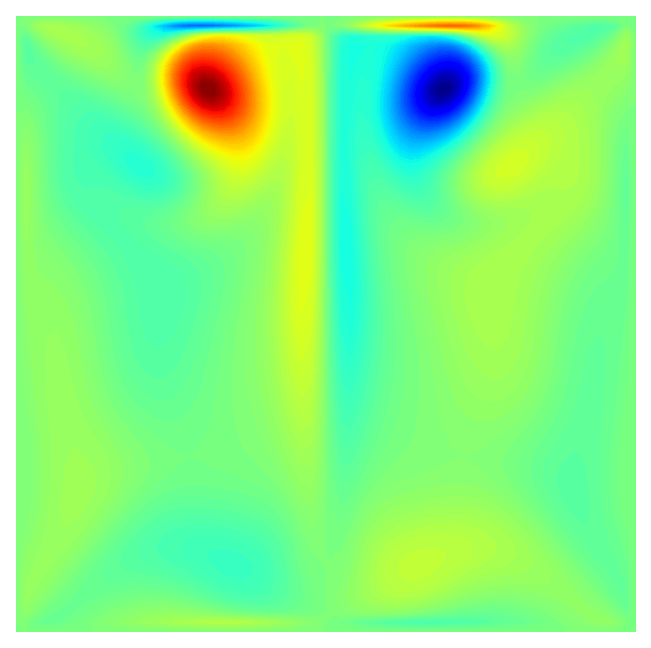

In [21]:
import matplotlib.animation as animation
from IPython.display import HTML

curl_frames = []

velocities_prev = np.zeros(vector_shape)
time_current = 0.0

for i in range(N_TIME_STEPS):
    time_current += TIME_STEP_LENGTH
    forces = forcing_function_vectorized(time_current, coordinates)

    velocities_forces_applied = velocities_prev + TIME_STEP_LENGTH * forces
    velocities_advected = advect(velocities_forces_applied, velocities_forces_applied)

    velocities_diffused = sc.sparse.linalg.cg(
        A=sc.sparse.linalg.LinearOperator(shape=(vector_dof, vector_dof), matvec=diffusion_operator),
        b=velocities_advected.flatten(),
        maxiter=MAX_ITER_CG,
    )[0].reshape(vector_shape)

    pressure = sc.sparse.linalg.cg(
        A=sc.sparse.linalg.LinearOperator(shape=(scalar_dof, scalar_dof), matvec=poisson_operator),
        b=divergence(velocities_diffused).flatten(),
        maxiter=MAX_ITER_CG,
    )[0].reshape(scalar_shape)

    velocities_projected = velocities_diffused - gradient(pressure)
    velocities_prev = velocities_projected

    curl = curl_2d(velocities_projected)
    curl_frames.append(curl.copy())  # store current frame


fig, ax = plt.subplots(figsize=(5, 5), dpi=160)
ax.set_axis_off()

frames = []
for curl in curl_frames:
    cont = ax.contourf(X, Y, curl, cmap='jet', levels=100)
    frames.append(cont.collections)

ani = animation.ArtistAnimation(fig, frames, interval=100, blit=True)

# Save as .gif using Pillow
ani.save("A vertical jet force vorticity.gif", writer='pillow', fps=10)
HTML('<img src="A vertical jet force vorticity.gif" width="600">')

A vertical jet of fluid emerging from a slot-like source on the bottom of a fluid tank, which shuts off after a short time

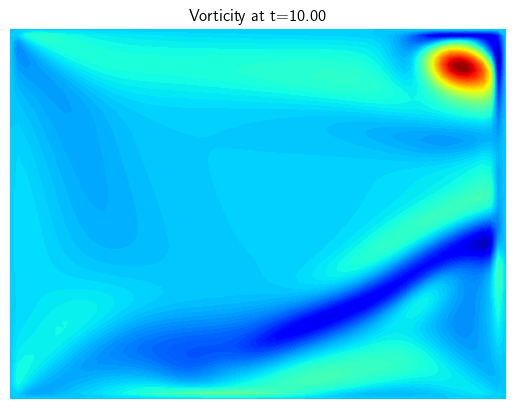

In [22]:
def forcing_function(time, point):
    time_decay = np.maximum(2.0 - 0.5 * time, 0.0)
    return time_decay * np.where((point[0] > 0.4) & (point[0] < 0.6) & (point[1] > 0.1) & (point[1] < 0.3),1.0, 0.0)

DOMAIN_SIZE         = 1.0
N_POINTS            = 64
N_TIME_STEPS        = 100
TIME_STEP_LENGTH    = 0.1
KINEMATIC_VISCOSITY = 0.0001
MAX_ITER_CG         = None
element_length = DOMAIN_SIZE / (N_POINTS - 1)
scalar_shape   = (N_POINTS, N_POINTS)
scalar_dof     = N_POINTS ** 2
vector_shape   = (N_POINTS, N_POINTS, 2)
vector_dof     = N_POINTS ** 2 * 2

# Grid creation
x = np.linspace(0.0, DOMAIN_SIZE, N_POINTS)
y = np.linspace(0.0, DOMAIN_SIZE, N_POINTS)
X, Y = np.meshgrid(x, y, indexing="ij")
coordinates = np.concatenate((X[..., np.newaxis], Y[..., np.newaxis]), axis=-1)
forcing_function_vectorized = np.vectorize(pyfunc=forcing_function,signature="(),(d)->(d)",)

# Initialize velocities
velocities_prev = np.zeros(vector_shape)
time_current = 0.0

plt.figure(figsize=(5, 5), dpi=160)

for i in range(N_TIME_STEPS):
    time_current += TIME_STEP_LENGTH
    forces = forcing_function(time_current, (X, Y))

    # Apply Forces
    velocities_forces_applied = velocities_prev + TIME_STEP_LENGTH * forces[..., np.newaxis]

    # Nonlinear convection
    velocities_advected = advect(velocities_forces_applied, velocities_forces_applied)

    # Diffuse
    velocities_diffused = sc.sparse.linalg.cg(
        A=sc.sparse.linalg.LinearOperator(shape=(vector_dof, vector_dof), matvec=diffusion_operator),
        b=velocities_advected.flatten(),maxiter=MAX_ITER_CG,)[0].reshape(vector_shape)

    # Pressure correction
    pressure = sc.sparse.linalg.cg(
        A=sc.sparse.linalg.LinearOperator(shape=(scalar_dof, scalar_dof), matvec=poisson_operator),
        b=divergence(velocities_diffused).flatten(),maxiter=MAX_ITER_CG,)[0].reshape(scalar_shape)

    # Correct velocities
    velocities_projected = velocities_diffused - gradient(pressure)

    # Advance to next time step
    velocities_prev = velocities_projected
    
    # Plotting
    clear_output(wait=True)
    plt.contourf(X, Y, curl_2d(velocities_projected), cmap='jet', levels=100)
    #plt.quiver(X, Y, velocities_projected[..., 0], velocities_projected[..., 1], color="dimgray")
    plt.title(f'Vorticity at t={time_current:.2f}')
    plt.axis('off')
    plt.show()

# Schrodinger's Eqn.

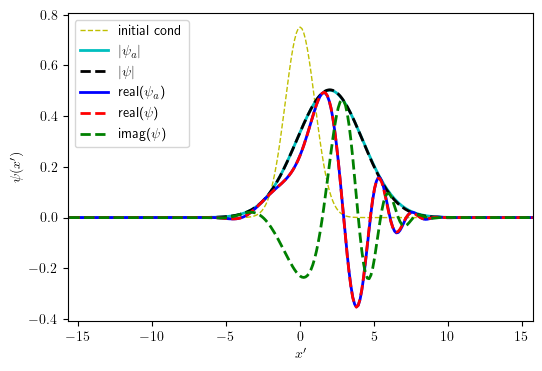

In [14]:
tf = 2
dt = 0.001
nsteps = int(tf/dt)
L = 10*np.pi
N = 256
h = L/N
j = np.arange(0,N)
x = j*h-L/2+h

# initcond
a = 0.1
k0 = 10
k0a = k0*a
init_f = 1/np.sqrt(np.sqrt(np.pi))*np.exp(-x**2/2)*np.exp(1j*k0a*x)

R = np.zeros(N+2)
R[1:N+1] = np.real(init_f)
R[0] = np.real(init_f[-1])
R[N+1] = np.real(init_f[0])

I = np.zeros(N+2)
I[1:N+1] = np.imag(init_f)
I[0] = np.imag(init_f[-1])
I[N+1] = np.imag(init_f[0])

# Goto t=dt/2 using Euler method
I[1:N+1] = I[1:N+1] + (dt/(4*h**2))*(R[2:N+2]-2*R[1:N+1]+R[0:N])
I[0] = I[N]
I[-1] = I[1]

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(x, np.abs(init_f), 'y--', lw = 1 , label = 'initial cond')
#ax1.plot(x, np.real(init_f), 'r--', lw = 1)
#ax1.plot(x, np.imag(init_f), 'g--', lw = 1)

# Evolution with Euler method.
for time_ind in range(nsteps+2):
    R[1:N+1] = R[1:N+1]- (dt/(2*h**2))*(I[2:N+2]-2*I[1:N+1]+I[0:N])
    R[0] = R[N]
    R[-1] = R[1]

    I[1:N+1] = I[1:N+1]+ (dt/(2*h**2))*(R[2:N+2]-2*R[1:N+1]+R[0:N])
    I[0] = I[N]
    I[-1] = I[1]

# Goto t=dt/2 using Euler method
R[1:N+1] = R[1:N+1] - (dt/(4*h**2))*(I[2:N+2]-2*I[1:N+1]+I[0:N])
R[0] = R[N]
R[-1] = R[1]

amp = 1/np.sqrt(np.sqrt(np.pi)*(1+1j*tf))
exp_term = np.exp(-(x-k0a*tf)**2/(2*(1+1j*tf)))
wave_term = np.exp(1j*k0a*(x-k0a*tf/2))
f_exact = amp*exp_term*wave_term

ax1.plot(x, abs(f_exact), 'c-', label = '$|\psi_a|$', lw = 2)
ax1.plot(x, np.sqrt(I[1:N+1]**2+R[1:N+1]**2), 'k--', label = '$|\psi|$', lw = 2)
ax1.plot(x, np.real(f_exact), 'b-', label = 'real($\psi_a$)', lw = 2)
ax1.plot(x, R[1:N+1],'r--', label = 'real($\psi$)', lw = 2)
ax1.plot(x, I[1:N+1], 'g--', label = 'imag($\psi$)', lw = 2)
ax1.set_xlim(-L/2,L/2)
ax1.set_xlabel("$x'$",fontsize=10)
ax1.set_ylabel("$\psi(x')$",fontsize=10)
plt.legend(loc= 'upper left')
plt.show()